# ESA Sentinel-5P L3 (GeoTIFF)
Sentinel-5P L3 (GeoTIFF) provides clipped Level 3 (daily composites) as Cloud Optimized GeoTIFFs (COGs) from Sentinel-5P mission. Sentinel-5P is a polar orbiting satellite that completes 14 orbits of the Earth a day. It carries the TROPOspheric Monitoring Instrument (TROPOMI) which is a spectrometer that senses ultraviolet (UV), visible (VIS), near (NIR) and short wave infrared (SWIR) to monitor ozone, methane, formaldehyde, aerosol, carbon monoxide, nitrogen dioxide and sulphur dioxide in the atmosphere.

For more information, refer to [UP42 Documentation](https://docs.up42.com/up42-blocks/data/esa-s5p-l3-gtiff.html) and [UP42 Marketplace](https://marketplace.up42.com/block/70919851-c563-4e5e-9393-029cf10377c7)

In [1]:
import geojson
import up42
import geopandas as gpd

In [2]:
up42.authenticate(project_id="12345", project_api_key="12345")
project = up42.initialize_project()

# Construct workflow
workflow = project.create_workflow(name="esa-s5p-workflow", use_existing=True)

2021-03-11 15:56:50,467 - Authentication with UP42 successful!
2021-03-11 15:56:51,226 - Initialized Project(name: Blocks, project_id: 810e8039-cb5c-445b-b08d-53b0dde1bde0, description: , createdAt: 2020-07-13T14:32:49.406Z)
2021-03-11 15:56:51,226 - Getting existing workflows in project ...
2021-03-11 15:56:51,657 - Got 54 workflows for project 810e8039-cb5c-445b-b08d-53b0dde1bde0.
100%|██████████| 54/54 [00:21<00:00,  2.51it/s]
2021-03-11 15:57:13,220 - Using existing workflow: esa-s5p-workflow - 1ecf3424-4dae-44a2-ac6b-79311dbc8089


In [3]:
input_tasks = ["esa-s5p-l3-gtiff"]
workflow.add_workflow_tasks(input_tasks)
# Define the aoi 
aoi = up42.get_example_aoi(as_dataframe=False)
# other options include to define aoi up42.draw_aoi(), up42.read_vector_file(), FeatureCollection, GeoDataFrame etc.

2021-03-11 15:57:16,291 - Added tasks to workflow: [{'name': 'esa-s5p-l3-gtiff:1', 'parentName': None, 'blockId': '70919851-c563-4e5e-9393-029cf10377c7'}]
2021-03-11 15:57:16,291 - Getting small example aoi in location 'Berlin'.


In [4]:
# Define the aoi 
barcelona_example_aoi = {
   "type":"Feature",
   "properties":{
      
   },
   "geometry":{
      "type": "Polygon",
      "coordinates": [
        [
          [
            2.109314,
            41.394249
          ],
          [
            2.241211,
            41.391234
          ],
          [
            2.241211,
            41.327326
          ],
          [
            2.083707,
            41.326001
          ],
          [
            2.109314,
            41.394249
          ]
        ]
      ]
    }
}
# other options include to define aoi up42.draw_aoi(), up42.read_vector_file(), FeatureCollection, GeoDataFrame etc.

In [5]:
# Get input parameters
workflow.get_parameters_info()

2021-03-11 15:57:16,783 - Got 1 tasks/blocks in workflow 1ecf3424-4dae-44a2-ac6b-79311dbc8089.


{'esa-s5p-l3-gtiff:1': {'bbox': {'type': 'array', 'default': None},
  'time': {'type': 'dateRange',
   'default': '2020-05-01T00:00:00+00:00/2021-12-31T23:59:59+00:00'},
  'layer': {'type': 'string'},
  'qa_mask': {'type': 'string', 'default': 'nomask'},
  'contains': {'type': 'geometry'},
  'intersects': {'type': 'geometry'},
  'geojson_url': {'type': 'string', 'default': None},
  'fail_on_missing': {'type': 'boolean', 'default': False}}}

In [6]:
# Define input parameters of the workflow to run it.
input_parameters = workflow.construct_parameters(geometry=barcelona_example_aoi, 
                                                 geometry_operation="intersects", 
                                                 start_date="2019-09-01",
                                                 end_date="2019-09-10")

In the above code cell, we created a basic input parameters. However, the block requires additional parameters as per workflow.get_parameters_info(). We will add those to our parameter configuration in the following steps:

In [7]:
data_block_additional_params = {"layer": "L3__CH4___",
                                "geojson_url": None,
                                "qa_mask": "nomask",}
# update input parameters with additional params
input_parameters['esa-s5p-l3-gtiff:1'] = {**input_parameters['esa-s5p-l3-gtiff:1'], **data_block_additional_params}

In [8]:
# check if everything is as expected
print(input_parameters)

{'esa-s5p-l3-gtiff:1': {'time': '2019-09-01T00:00:00Z/2019-09-10T23:59:59Z', 'qa_mask': 'nomask', 'fail_on_missing': False, 'intersects': {'type': 'Polygon', 'coordinates': (((2.109314, 41.394249), (2.241211, 41.391234), (2.241211, 41.327326), (2.083707, 41.326001), (2.109314, 41.394249)),)}, 'layer': 'L3__CH4___', 'geojson_url': None}}


In [9]:
# Price estimation
workflow.estimate_job(input_parameters)

2021-03-11 15:57:22,208 - Estimated: 1-1 Credits, Duration: 0-0 min.


{'esa-s5p-l3-gtiff:1': {'blockConsumption': {'resources': {'unit': 'SQUARE_KM',
    'min': 890.336938,
    'max': 890.336938},
   'credit': {'min': 0, 'max': 0}},
  'machineConsumption': {'duration': {'min': 0, 'max': 0},
   'credit': {'min': 1, 'max': 1}}}}

In [10]:
# Run the actual job.
job = workflow.run_job(input_parameters, track_status=True)

job.download_results()

2021-03-11 15:57:22,217 - Selected input_parameters: {'esa-s5p-l3-gtiff:1': {'time': '2019-09-01T00:00:00Z/2019-09-10T23:59:59Z', 'qa_mask': 'nomask', 'fail_on_missing': False, 'intersects': {'type': 'Polygon', 'coordinates': (((2.109314, 41.394249), (2.241211, 41.391234), (2.241211, 41.327326), (2.083707, 41.326001), (2.109314, 41.394249)),)}, 'layer': 'L3__CH4___', 'geojson_url': None}}
2021-03-11 15:57:24,658 - Created and running new job: d92b07ef-d129-4512-8730-54d5426454c3.
2021-03-11 15:57:25,059 - Tracking job status continuously, reporting every 30 seconds...
2021-03-11 15:57:47,031 - Job finished successfully! - d92b07ef-d129-4512-8730-54d5426454c3
2021-03-11 15:57:52,036 - Downloading results of job d92b07ef-d129-4512-8730-54d5426454c3
2021-03-11 15:57:52,039 - Download directory: /Users/thais.bendixen/playground/Q1_21/SDK_examples_hackathon/project_810e8039-cb5c-445b-b08d-53b0dde1bde0/job_d92b07ef-d129-4512-8730-54d5426454c3
2it [00:00, 24385.49it/s]
2021-03-11 15:57:52,770

['/Users/thais.bendixen/playground/Q1_21/SDK_examples_hackathon/project_810e8039-cb5c-445b-b08d-53b0dde1bde0/job_d92b07ef-d129-4512-8730-54d5426454c3/data.json',
 '/Users/thais.bendixen/playground/Q1_21/SDK_examples_hackathon/project_810e8039-cb5c-445b-b08d-53b0dde1bde0/job_d92b07ef-d129-4512-8730-54d5426454c3/96594ccb-731b-4fe5-8021-28cc494d1d9f/S5P_e2555c6a-b85f-4019-b58d-d6202358f80c_20190908.tif',
 '/Users/thais.bendixen/playground/Q1_21/SDK_examples_hackathon/project_810e8039-cb5c-445b-b08d-53b0dde1bde0/job_d92b07ef-d129-4512-8730-54d5426454c3/96594ccb-731b-4fe5-8021-28cc494d1d9f/S5P_5fa5d956-24d4-4e8d-afc5-1a914a4f937d_20190904.tif',
 '/Users/thais.bendixen/playground/Q1_21/SDK_examples_hackathon/project_810e8039-cb5c-445b-b08d-53b0dde1bde0/job_d92b07ef-d129-4512-8730-54d5426454c3/96594ccb-731b-4fe5-8021-28cc494d1d9f/S5P_2e1c4f47-5053-41e9-b1ca-394bace552a3_20190907.tif',
 '/Users/thais.bendixen/playground/Q1_21/SDK_examples_hackathon/project_810e8039-cb5c-445b-b08d-53b0dde1bde0/

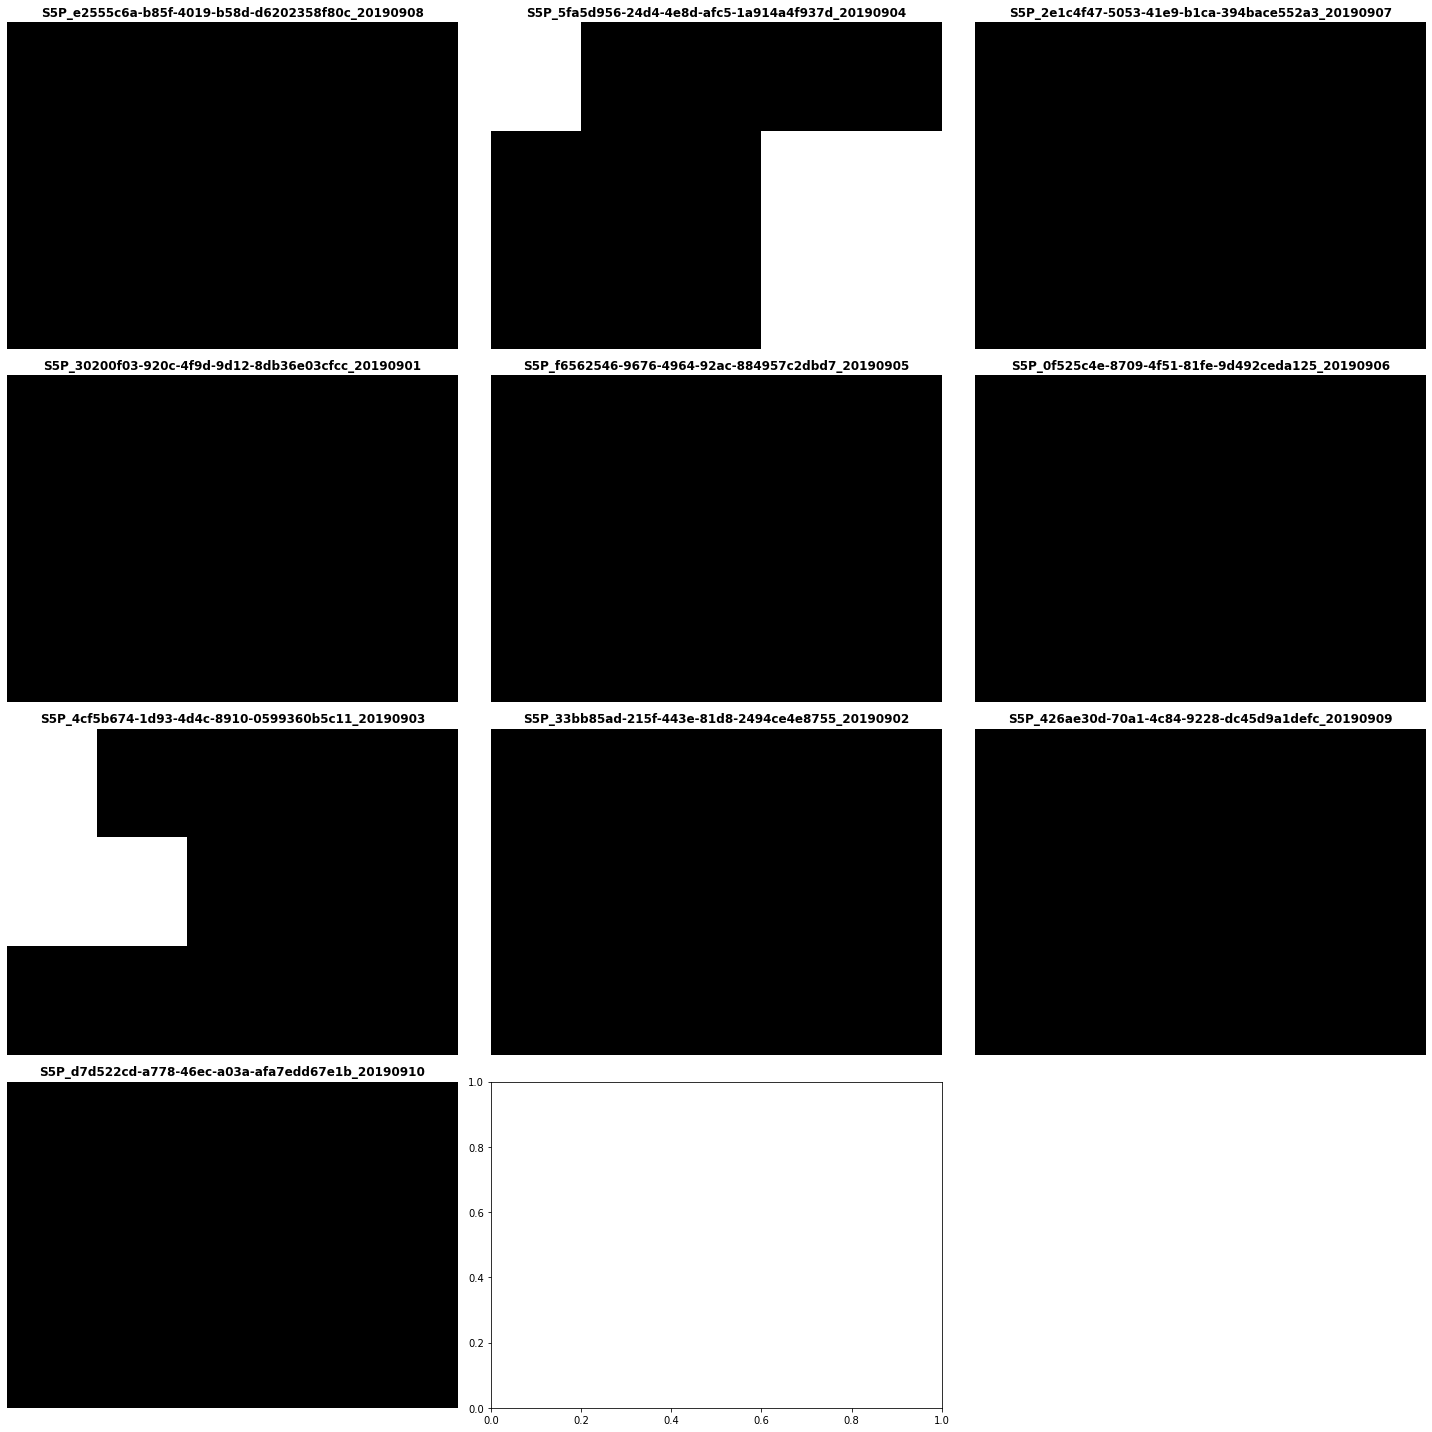

In [11]:
job.plot_results(figsize=(20,20), bands=[1])